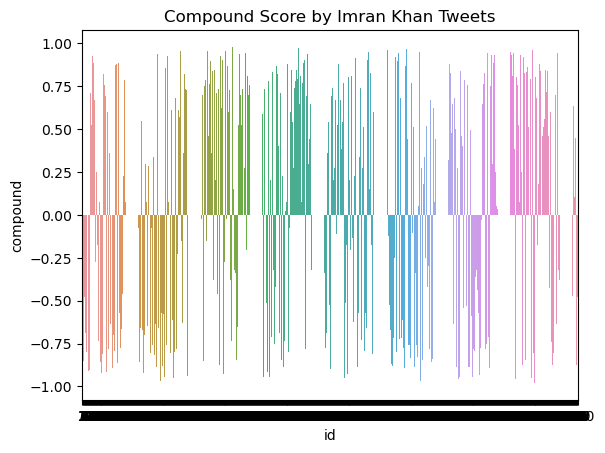

In [16]:
# TWITTER SENTIMENT ANALYSIS

# Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import nltk

# nltk.download('maxent_ne_chunker')
# nltk.download('words')
# nltk.download('punkt')
# nltk.download('vader_lexicon')
# nltk.download('all')

# Import the dataset

DataFrame = pd.read_csv("./ImranKhanPTI.csv")
DataFrame.head()

## Quick EDA

# Checking the shape of the dataset
DataFrame.shape

# Performing the sentiment analysis on one tweet, to do so we are taking first tweet
example = DataFrame['Tweets'].values[0]
display(example)

# Tokenizing that tweet and display the first 10 
tokens = nltk.word_tokenize(example)
display(tokens[:10])

## POS Tagging
POS Tagging in NLTK is a process to mark up the words in text format for a particular part of a speech based on its definition and context. Some NLTK POS tagging examples are: CC, CD, EX, JJ, MD, NNP, PDT, PRP$, TO, etc. POS tagger is used to assign grammatical information of each word of the sentence

# Applying the POS taging on that tweet
tagged = nltk.pos_tag(tokens)
tagged[:10]

# The primary usage of chunking is to make a group of "noun phrases." The parts of speech are combin.
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint # pretty print

## Feature Engineering

# Droping the unnecessary columns
df = DataFrame.drop(['Date', 'User'], axis = 'columns')
df.head()

# Inserting a column name "id"
df.insert(loc = 0, column ='id', value = df.index+1)
df.head()

# Import Sentiment Analyzer

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm 
# tqdm is a library in Python which is used for creating Progress Meters or Progress Bars. 

sia = SentimentIntensityAnalyzer()

sia

sia.polarity_scores(example)

# Run the polarity score on the entire dataset
result = {}
for i, row in df.iterrows():
    text = row['Tweets']
    myid = row['id']
    result[myid] = sia.polarity_scores(text)

vaders = pd.DataFrame(result).T
vaders = vaders.reset_index().rename(columns = {'index':'id'})
vaders = vaders.merge(df)

# Now we have sentiment scores and metadata
vaders.head()

ax = sns.barplot(data=vaders, x='id', y='compound')
ax.set_title('Compound Score by Imran Khan Tweets')
plot = plt.show()
# plot.savefig('Compound Score by Imran Khan Tweets.png')